## support Vector Classifier

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,random_state=23)

In [155]:
x

array([[-0.5928702 ,  1.22442221],
       [-1.24103977,  0.64394441],
       [-1.1208303 , -0.39350826],
       ...,
       [-0.77732987, -1.37245697],
       [-1.39428116,  0.94531499],
       [-0.80264729, -1.72042632]])

<Axes: xlabel='1', ylabel='0'>

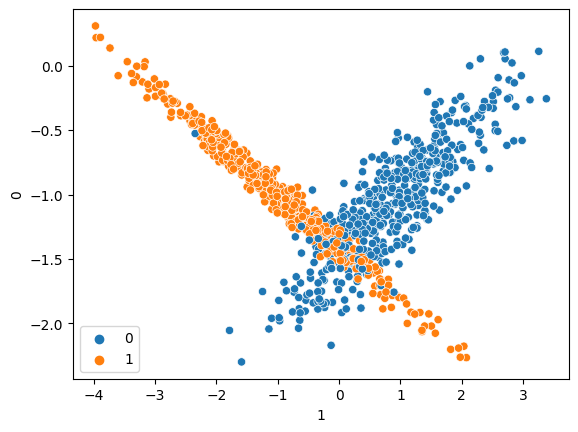

In [156]:
sns.scatterplot(y=pd.DataFrame(x)[0],x=pd.DataFrame(x)[1],hue=y)

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=15)

In [158]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [159]:
ypred= model.predict(x_test)

In [160]:
from sklearn.metrics import classification_report , confusion_matrix

In [161]:
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred,))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       157
           1       0.76      0.93      0.84       143

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

[[115  42]
 [ 10 133]]


In [162]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8266666666666667


# rbf 

In [163]:
rbf = SVC(kernel='rbf')
rbf.fit(x_train,y_train)

SVC()

In [164]:
ypred1=rbf.predict(x_test)

In [165]:
print(classification_report(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(accuracy_score(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       157
           1       0.92      0.85      0.88       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[146  11]
 [ 22 121]]
0.89


# polynomial

In [166]:
polyn=SVC(kernel='poly')
polyn.fit(x_train,y_train)


SVC(kernel='poly')

In [167]:
ypred2=polyn.predict(x_test)
print(classification_report(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(accuracy_score(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.88      0.64      0.74       143

    accuracy                           0.79       300
   macro avg       0.81      0.78      0.78       300
weighted avg       0.81      0.79      0.78       300

[[145  12]
 [ 52  91]]
0.7866666666666666


# sigmoid

In [168]:
sigma=SVC(kernel='sigmoid')
sigma.fit(x_train,y_train)
ypred3=sigma.predict(x_test)
print(classification_report(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       157
           1       0.71      0.76      0.73       143

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300

[[112  45]
 [ 35 108]]
0.7333333333333333


# hyper parameter tunning

In [169]:
from sklearn.model_selection import GridSearchCV
pramete={
    'C':[1,100,0.1,0.01],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf','sigmoid']
}
grid = GridSearchCV(SVC(),param_grid=pramete,cv=5,refit=True,verbose=3)

In [170]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.779 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.793 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.779 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.693 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.707 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100, 0.1, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [171]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [172]:
ypred4=grid.predict(x_test)
print(classification_report(y_test,ypred4))
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       157
           1       0.88      0.98      0.93       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[138  19]
 [  3 140]]
0.9266666666666666
